<a href="https://colab.research.google.com/github/HectorHc2014/CatDogs-Mushrooms_keras/blob/master/Trabajo_de_Curso_FSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reconocedor de gatos y perros**
Se va a tratar de crear una Red Neuronal Convolutiva la cual sea capaz de diferenciar un perro de un gato.

##**Notas**


*   El dataset ha sido obtenido desde Kaggle.
*   El dataset está guardado en un drive, por lo tanto la primera vez que se acceden a ellos y se cargan en memoria en la parte de training.



###Acceso al drive 

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


###Comprobación de que podemos acceder a los datos que vamos a usar

test_set  training_set


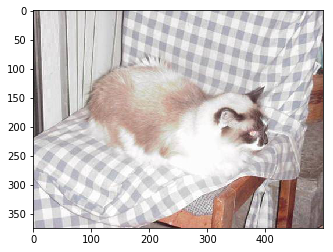

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/test_set/cats/cat.4011.jpg', 'r')
imshow(np.asarray(pil_im))

###Comprobación de que se dispone de GPU

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

##Data Source

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K
import keras
from time import time
from PIL import ImageFile


ImageFile.LOAD_TRUNCATED_IMAGES = True

batch_size = 32

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/training_set'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/test_set'


train_datagen= ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')



Found 7676 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


##Model

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3 ),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_143 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 78400)             0         
__________

##Training

In [0]:
epochs =10

history=model.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples // batch_size,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=  validation_generator.samples // batch_size,
)

Epoch 1/10
239/239 [==============================] - 100s 419ms/step - loss: 0.7045 - acc: 0.5494 - val_loss: 0.6714 - val_acc: 0.5837
Epoch 2/10
239/239 [==============================] - 94s 391ms/step - loss: 0.6712 - acc: 0.5843 - val_loss: 0.6728 - val_acc: 0.5935
Epoch 3/10
239/239 [==============================] - 95s 396ms/step - loss: 0.6392 - acc: 0.6389 - val_loss: 0.6193 - val_acc: 0.6657
Epoch 4/10
239/239 [==============================] - 94s 394ms/step - loss: 0.6150 - acc: 0.6667 - val_loss: 0.6152 - val_acc: 0.6768
Epoch 5/10
239/239 [==============================] - 94s 392ms/step - loss: 0.5997 - acc: 0.6820 - val_loss: 0.5945 - val_acc: 0.7043
Epoch 6/10
239/239 [==============================] - 93s 389ms/step - loss: 0.5721 - acc: 0.7018 - val_loss: 0.5768 - val_acc: 0.7266
Epoch 7/10
239/239 [==============================] - 93s 388ms/step - loss: 0.5567 - acc: 0.7214 - val_loss: 0.5631 - val_acc: 0.7215
Epoch 8/10
239/239 [==============================] - 

##Vista resumen del entrenamiento

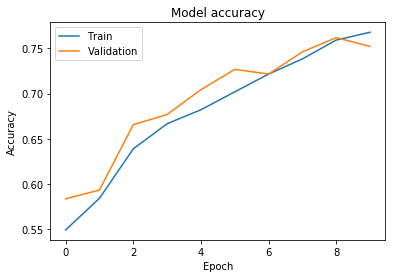

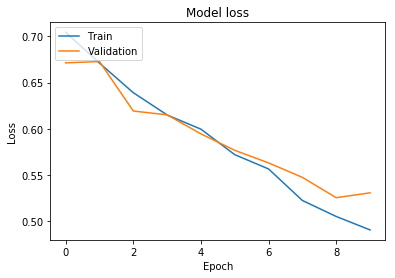

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###Guardamos el modelo para poder usarlo en otro momento

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/models/catdog_model.h5')

##Test

In [0]:
y_testRes =['cats','dogs']
y_test = [1,2,2,1]
X_test = np.empty((4,150,150,3))
X_test[0] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/Pruebas/gato1.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[1] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/Pruebas/perro1.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[2] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/Pruebas/perro2.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[3] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/Pruebas/gato2.jpg')).resize((150,150))).reshape(1,150,150,3)/255
predictions = model.predict(X_test)
for p,l in zip(predictions, y_test):
  print(p, "->", l)
  result = np.where(p == np.amax(p))[0]
  print("Predicción: ", y_testRes[int(result)], " ||| ", "Valor Real: ", y_testRes[l-1])

[0.7956865  0.20431356] -> 1
Predicción:  cats  |||  Valor Real:  cats
[0.08308061 0.9169194 ] -> 2
Predicción:  dogs  |||  Valor Real:  dogs
[0.20904064 0.79095936] -> 2
Predicción:  dogs  |||  Valor Real:  dogs
[0.4935001 0.5064999] -> 1
Predicción:  dogs  |||  Valor Real:  cats


#Identificar gatos y perros entrenando el vgg-16

##Model

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Model, load_model
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
for layer in model_vgg16.layers[2:]:
    layer.trainable = False
x = Flatten()(model_vgg16.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softplus')(x)
model = Model(input=model_vgg16.input, output=x)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


##Training

In [0]:
epochs = 10

history=model.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples // batch_size,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=  validation_generator.samples // batch_size,
)

Epoch 1/10
239/239 [==============================] - 118s 495ms/step - loss: 0.3421 - acc: 0.8544 - val_loss: 0.1877 - val_acc: 0.9192
Epoch 2/10
239/239 [==============================] - 112s 468ms/step - loss: 0.2409 - acc: 0.8986 - val_loss: 0.1564 - val_acc: 0.9360
Epoch 3/10
239/239 [==============================] - 112s 470ms/step - loss: 0.2018 - acc: 0.9145 - val_loss: 0.1409 - val_acc: 0.9405
Epoch 4/10
239/239 [==============================] - 112s 469ms/step - loss: 0.1790 - acc: 0.9255 - val_loss: 0.1327 - val_acc: 0.9548
Epoch 5/10
239/239 [==============================] - 112s 467ms/step - loss: 0.1736 - acc: 0.9267 - val_loss: 0.1604 - val_acc: 0.9380
Epoch 6/10
239/239 [==============================] - 113s 471ms/step - loss: 0.1610 - acc: 0.9352 - val_loss: 0.1511 - val_acc: 0.9370
Epoch 7/10
239/239 [==============================] - 111s 467ms/step - loss: 0.1499 - acc: 0.9394 - val_loss: 0.1199 - val_acc: 0.9543
Epoch 8/10
239/239 [============================

##Vista resumen del entrenamiento

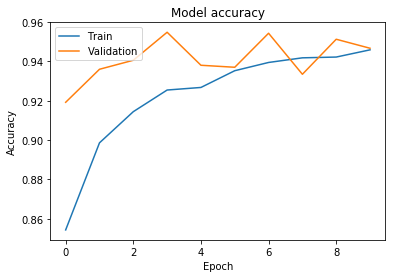

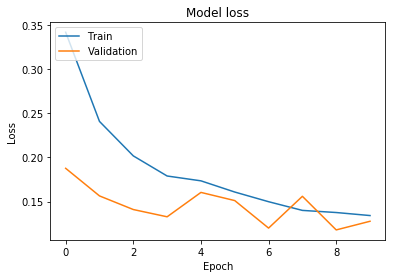

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Test

In [0]:
y_testRes =['cats','dogs']
y_test = [1,2,2,1]
X_test = np.empty((4,150,150,3))
X_test[0] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/Pruebas/gato1.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[1] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/Pruebas/perro1.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[2] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/Pruebas/perro2.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[3] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Cats_Dogs/Pruebas/gato2.jpg')).resize((150,150))).reshape(1,150,150,3)/255
predictions = model.predict(X_test)
for p,l in zip(predictions, y_test):
  print(p, "->", l)
  result = np.where(p == np.amax(p))[0]
  print("Predicción: ", y_testRes[int(result)], " ||| ", "Valor Real: ", y_testRes[l-1])

[1.1633234e+01 1.0207356e-02] -> 1
Predicción:  cats  |||  Valor Real:  cats
[2.1086142e-03 1.3713501e+01] -> 2
Predicción:  dogs  |||  Valor Real:  dogs
[0.0325033 5.508948 ] -> 2
Predicción:  dogs  |||  Valor Real:  dogs
[4.267823   0.08222596] -> 1
Predicción:  cats  |||  Valor Real:  cats


#Clasificador de varios tipos de setas
Se va a intentar crear una red neuronal la cual sea capaz de diferenciar entre varias categorias de setas

###Acceso al drive

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


###Comprobación de que se pueden acceder a los datos

Agaricus  Boletus      Entoloma   Lactarius  Suillus
Amanita   Cortinarius  Hygrocybe  Russula


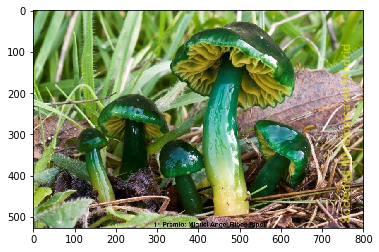

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets/Mushrooms"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Mushrooms/Hygrocybe/001_p-EUoR7BDfY.jpg', 'r')
imshow(np.asarray(pil_im))

###Comprobación de que se dispone de GPU

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

##Data Source

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

batch_size = 20

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Mushrooms'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Mushrooms'


train_datagen= ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')


Found 5375 images belonging to 9 classes.
Found 1339 images belonging to 9 classes.


##Model

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_165 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 33, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 16, 16, 128)       0         
__________

##Training

In [0]:
epochs = 10

history=model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
)

Epoch 1/10
268/268 [==============================] - 134s 499ms/step - loss: 2.0180 - acc: 0.2390 - val_loss: 1.9546 - val_acc: 0.2712
Epoch 2/10
268/268 [==============================] - 126s 469ms/step - loss: 1.8846 - acc: 0.2907 - val_loss: 1.9436 - val_acc: 0.2933
Epoch 3/10
268/268 [==============================] - 126s 472ms/step - loss: 1.7892 - acc: 0.3405 - val_loss: 1.8909 - val_acc: 0.3045
Epoch 4/10
268/268 [==============================] - 128s 476ms/step - loss: 1.7387 - acc: 0.3611 - val_loss: 1.8206 - val_acc: 0.3359
Epoch 5/10
268/268 [==============================] - 128s 478ms/step - loss: 1.6784 - acc: 0.3901 - val_loss: 1.8015 - val_acc: 0.3503
Epoch 6/10
268/268 [==============================] - 128s 478ms/step - loss: 1.6229 - acc: 0.4126 - val_loss: 1.8561 - val_acc: 0.3254
Epoch 7/10
268/268 [==============================] - 128s 479ms/step - loss: 1.5558 - acc: 0.4297 - val_loss: 1.7157 - val_acc: 0.3811
Epoch 8/10
268/268 [============================

##Vista resumen del entrenamiento

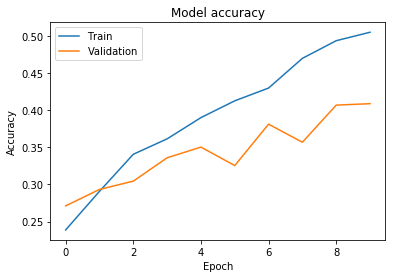

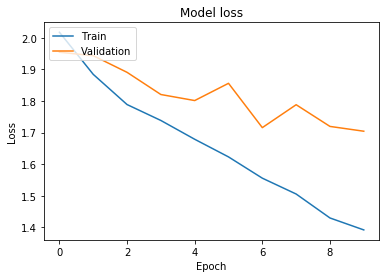

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Test

In [0]:
y_testRes =['Agaricus','Amanita','Boletus','Cortinarius','Entoloma','Hygrocybe','Lactarius','Russula','Suillus']
y_test = [1,2,3,4,5,6,7,8,9]
X_test = np.empty((9,150,150,3))
X_test[0] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Agaricus.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[1] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Amanita.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[2] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Boletus.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[3] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Cortinarius.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[4] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Entoloma.jpeg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[5] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Hygrocybe.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[6] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Lactarius.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[7] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Russula.jpeg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[8] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Suillus.jpg')).resize((150,150))).reshape(1,150,150,3)/255
predictions = model.predict(X_test)
for p,l in zip(predictions, y_test):
  print(p, "->", l)
  result = np.where(p == np.amax(p))[0]
  print("Predicción: ", y_testRes[int(result)], " ||| ", "Valor Real: ", y_testRes[l-1])

[1.9969543e-02 8.7192607e-01 5.1367800e-03 5.7842121e-02 7.8871595e-03
 7.0060079e-04 1.7755503e-02 1.6109072e-02 2.6730634e-03] -> 1
Predicción:  Amanita  |||  Valor Real:  Agaricus
[0.00064808 0.2912395  0.00948279 0.02376515 0.00063155 0.01546983
 0.0047424  0.6119029  0.04211781] -> 2
Predicción:  Russula  |||  Valor Real:  Amanita
[0.01396979 0.03210803 0.00071528 0.32591695 0.00203498 0.00154388
 0.11427455 0.50662297 0.00281355] -> 3
Predicción:  Russula  |||  Valor Real:  Boletus
[0.03232565 0.2993781  0.07107176 0.37525865 0.03404484 0.00737745
 0.11465746 0.04467753 0.02120866] -> 4
Predicción:  Cortinarius  |||  Valor Real:  Cortinarius
[0.07053146 0.17088464 0.0011152  0.20065771 0.26564214 0.01263308
 0.15108745 0.12036616 0.00708222] -> 5
Predicción:  Entoloma  |||  Valor Real:  Entoloma
[2.5002498e-06 1.2442587e-03 8.7680190e-04 1.5549268e-02 2.7301516e-03
 9.6971995e-01 3.8159436e-03 5.9382575e-05 6.0017477e-03] -> 6
Predicción:  Hygrocybe  |||  Valor Real:  Hygrocybe
[

###Guardamos el modelo para usarlo en otro momento

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/models/mushrooms_model.h5')

#Clasificador mediante el vgg-16

##Model

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Model, load_model
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
for layer in model_vgg16.layers[2:]:
    layer.trainable = False
x = Flatten()(model_vgg16.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(9, activation='softplus')(x)
model = Model(input=model_vgg16.input, output=x)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


##Training

In [0]:
epochs = 10

history=model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
)

Epoch 1/10
268/268 [==============================] - 155s 578ms/step - loss: 1.9603 - acc: 0.2814 - val_loss: 1.7535 - val_acc: 0.3873
Epoch 2/10
268/268 [==============================] - 144s 538ms/step - loss: 1.7642 - acc: 0.3650 - val_loss: 1.6232 - val_acc: 0.4110
Epoch 3/10
268/268 [==============================] - 145s 543ms/step - loss: 1.6875 - acc: 0.4097 - val_loss: 1.5645 - val_acc: 0.4520
Epoch 4/10
268/268 [==============================] - 145s 542ms/step - loss: 1.5819 - acc: 0.4409 - val_loss: 1.6254 - val_acc: 0.4196
Epoch 5/10
268/268 [==============================] - 145s 539ms/step - loss: 1.5276 - acc: 0.4705 - val_loss: 1.4798 - val_acc: 0.4800
Epoch 6/10
268/268 [==============================] - 145s 540ms/step - loss: 1.4582 - acc: 0.4958 - val_loss: 1.5107 - val_acc: 0.4680
Epoch 7/10
268/268 [==============================] - 144s 539ms/step - loss: 1.3823 - acc: 0.5050 - val_loss: 1.4703 - val_acc: 0.5005
Epoch 8/10
268/268 [============================

##Vista resumen del entrenamiento

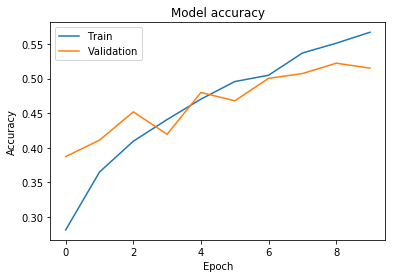

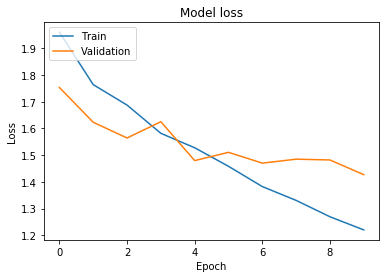

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Test

In [0]:
y_testRes =['Agaricus','Amanita','Boletus','Cortinarius','Entoloma','Hygrocybe','Lactarius','Russula','Suillus']
y_test = [1,2,3,4,5,6,7,8,9]
X_test = np.empty((9,150,150,3))
X_test[0] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Agaricus.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[1] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Amanita.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[2] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Boletus.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[3] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Cortinarius.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[4] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Entoloma.jpeg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[5] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Hygrocybe.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[6] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Lactarius.jpg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[7] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Russula.jpeg')).resize((150,150))).reshape(1,150,150,3)/255
X_test[8] = np.array((Image.open('/content/drive/My Drive/Colab Notebooks/datasets/MushroomsPruebas/Suillus.jpg')).resize((150,150))).reshape(1,150,150,3)/255
predictions = model.predict(X_test)
for p,l in zip(predictions, y_test):
  print(p, "->", l)
  result = np.where(p == np.amax(p))[0]
  print("Predicción: ", y_testRes[int(result)], " ||| ", "Valor Real: ", y_testRes[l-1])

[5.17285287e-01 1.82753563e+01 4.12874250e-03 3.78417899e-04
 1.02395534e-04 1.44152395e-07 3.81838632e+00 2.98860259e-02
 8.29948171e-04] -> 1
Predicción:  Amanita  |||  Valor Real:  Agaricus
[1.3828182e-05 4.1680286e+01 1.5814449e-09 2.8654118e-10 9.8504364e-11
 6.8629127e-08 6.5630064e-11 4.9262094e-01 5.9189239e-07] -> 2
Predicción:  Amanita  |||  Valor Real:  Amanita
[4.4401938e-01 8.9235716e+00 1.8605769e-01 2.7433715e+00 1.4901050e-05
 6.3887687e-04 2.7060143e-05 2.2456198e+00 1.8766928e+00] -> 3
Predicción:  Amanita  |||  Valor Real:  Boletus
[3.3294380e-01 7.8249520e-01 8.3470306e+00 5.9615240e+00 6.6063881e-01
 9.4404945e-04 8.2004747e+00 7.3334499e-04 6.3620812e-01] -> 4
Predicción:  Boletus  |||  Valor Real:  Cortinarius
[0.53078157 1.9255183  1.7711853  2.7903624  4.177168   0.01160148
 2.261271   0.2323872  1.1941969 ] -> 5
Predicción:  Entoloma  |||  Valor Real:  Entoloma
[9.8406512e-04 3.4326382e-04 1.5778784e-01 5.2769572e-02 3.5190716e-01
 8.1041975e+00 2.6373830e-02 